#Hackathon: Machine Learning

#Problem Statement:
About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. The customer first applies for a home loan after that, the company validates the customer's eligibility for a loan.


#Problem
The company wants to automate the loan eligibility process (real-time) based on customer details provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.


#1. Getting the System Ready and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [15]:
# Load dataset"
traindata = pd.read_csv("loan_sanction_test.csv")
testdata=pd.read_csv("loan_sanction_train.csv")


#2.	Understanding the data

2.1 Initial Data Exploration


In [16]:
# Display the first few rows of the training dataset
print(traindata.head())
# Display the first few rows of the test dataset
print(testdata.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [17]:
# Check data types and missing values for the training dataset
print(traindata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [18]:

# Check data types and missing values for the test dataset
print(testdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [19]:

# Summary statistics for the training dataset
print(traindata.describe())
# Summary statistics for the test dataset
print(testdata.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         61

#1. Missing value and outlier treatment

In [20]:
print(traindata.isnull().sum())
print(testdata.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [21]:
# Impute missing values in the training dataset
traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
traindata['Dependents'].fillna(traindata['Dependents'].mode()[0], inplace=True)
traindata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0], inplace=True)
traindata['Credit_History'].fillna(traindata['Credit_History'].mode()[0], inplace=True)
traindata['LoanAmount'].fillna(traindata['LoanAmount'].median(), inplace=True)
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].median(), inplace=True)

# Impute missing values in the test dataset
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Married'].fillna(testdata['Married'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].median(), inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].median(), inplace=True)

# Verify that there are no missing values left
print("\nMissing Values in Train Dataset After Imputation:")
print(traindata.isnull().sum())

print("\nMissing Values in Test Dataset After Imputation:")
print(testdata.isnull().sum())



Missing Values in Train Dataset After Imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Missing Values in Test Dataset After Imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\anive\AppData\Local\Temp\ipykernel_1664\3211918583.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
C:\Users\anive\AppData\Local\Temp\ipykernel_1664\3211918583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

#3. Exploratory Data Analysis (EDA)

#Univariate Analysis

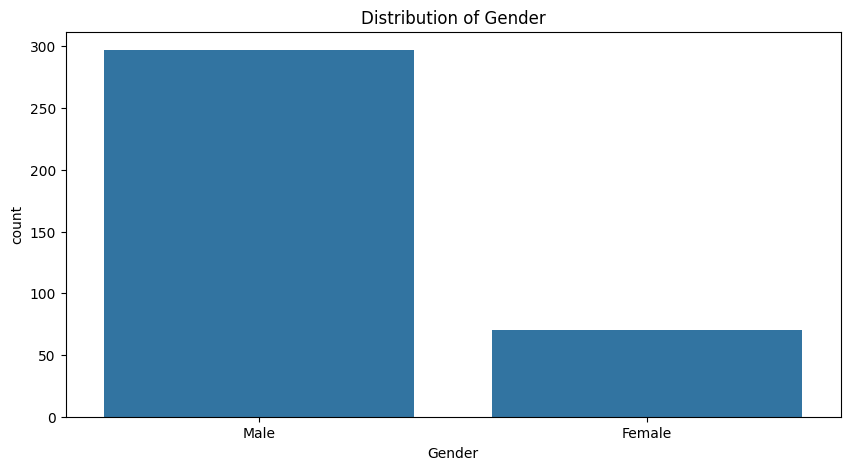

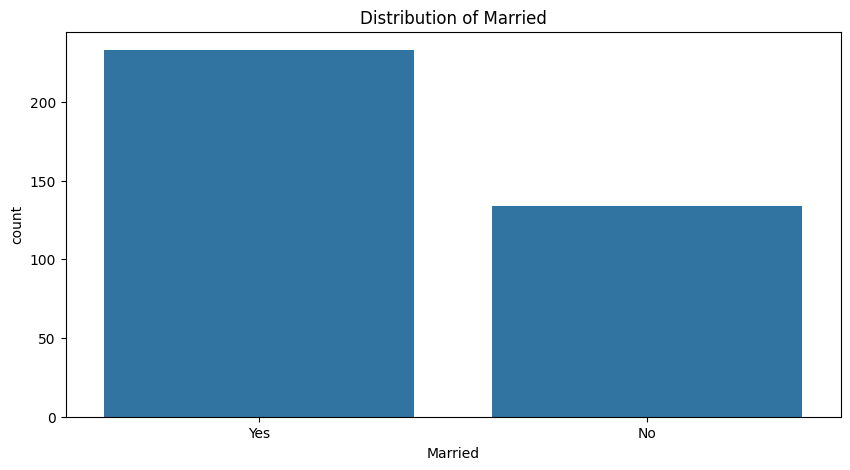

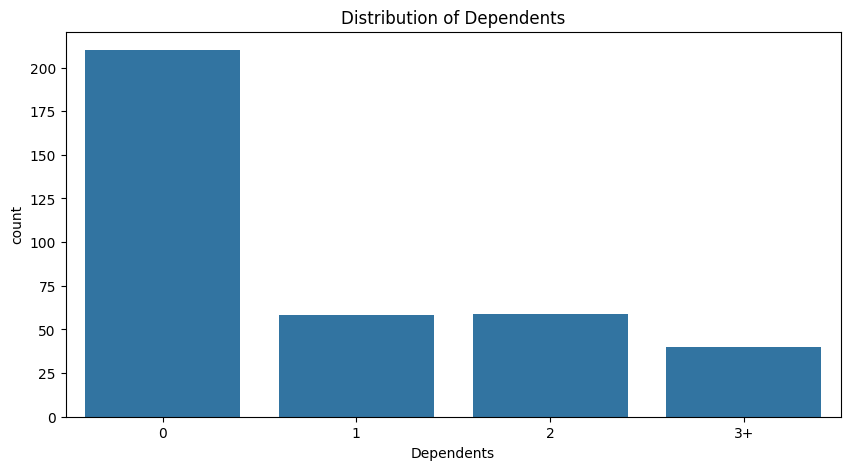

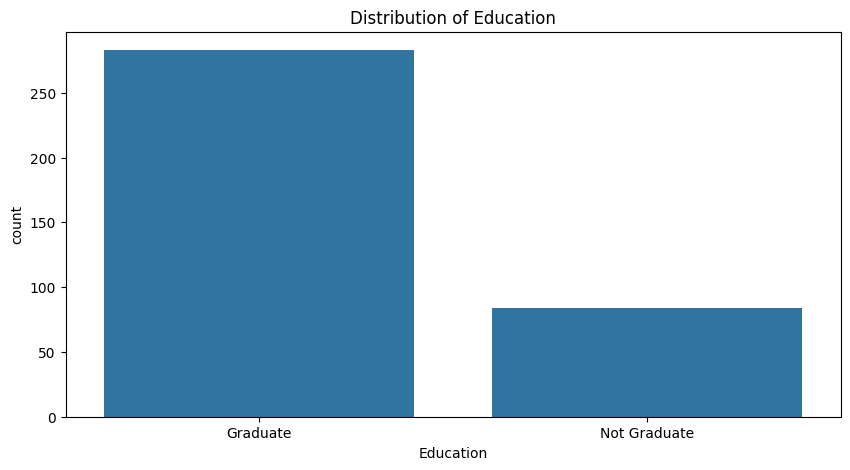

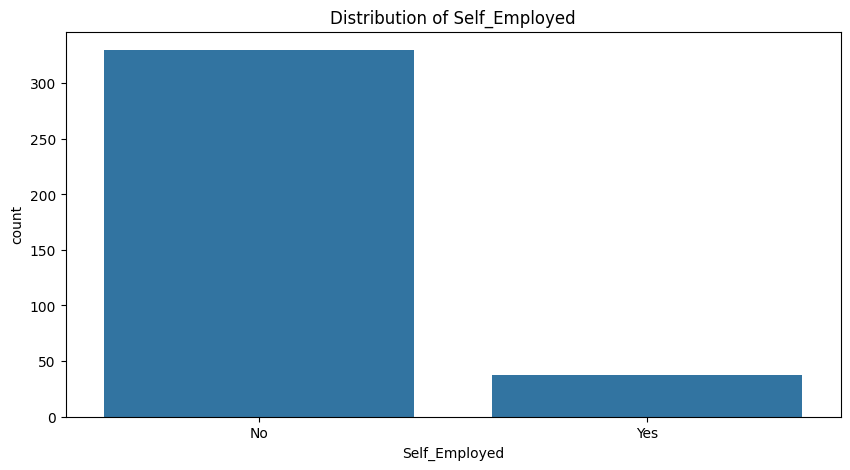

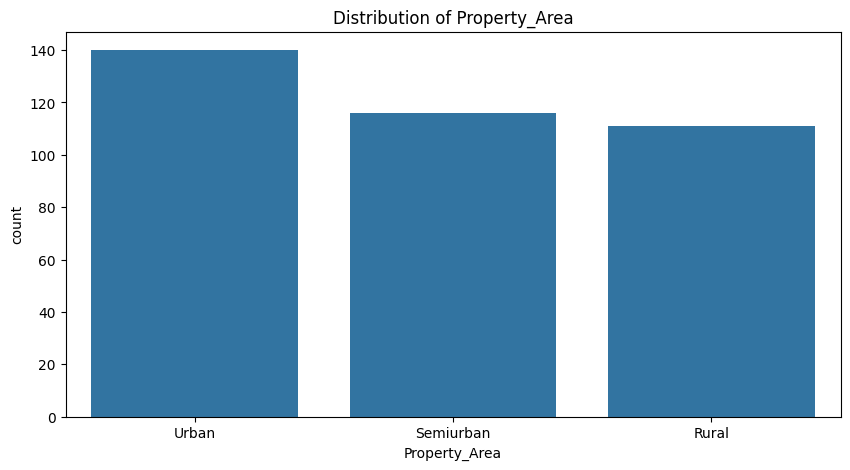

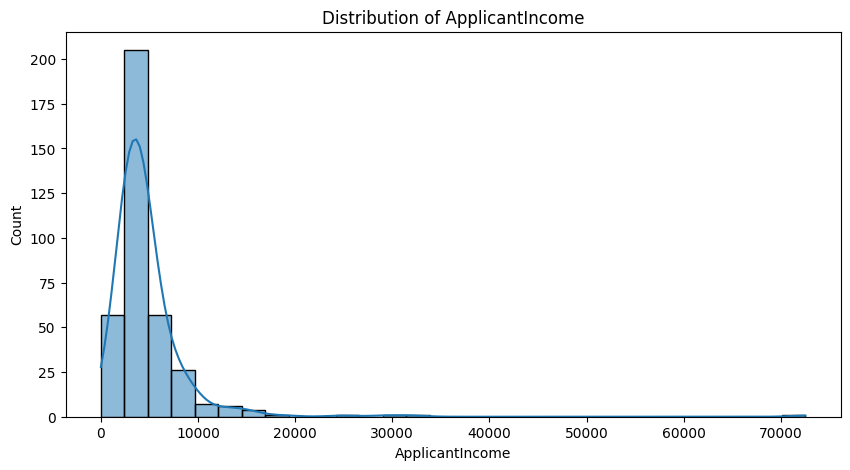

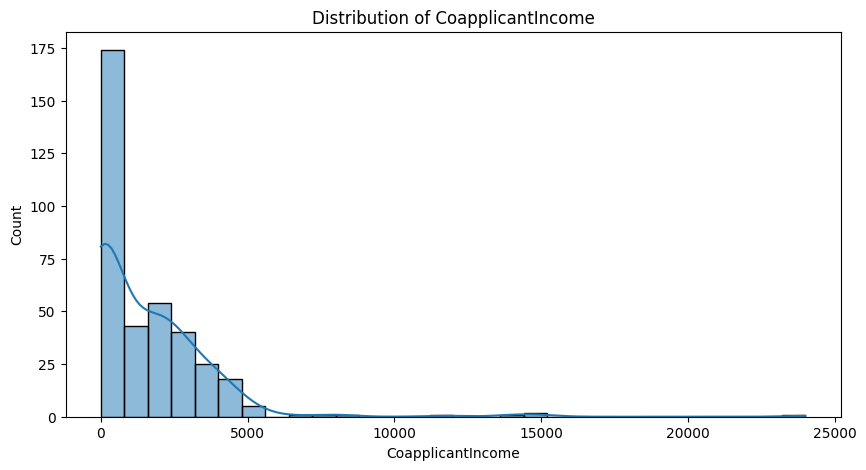

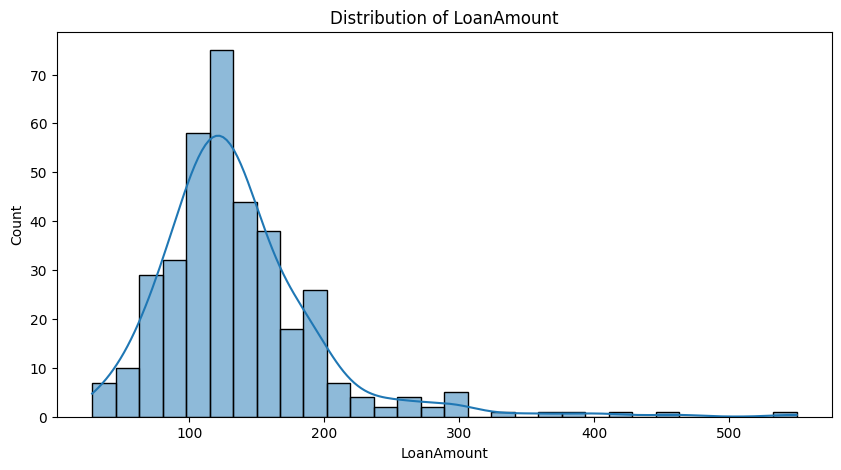

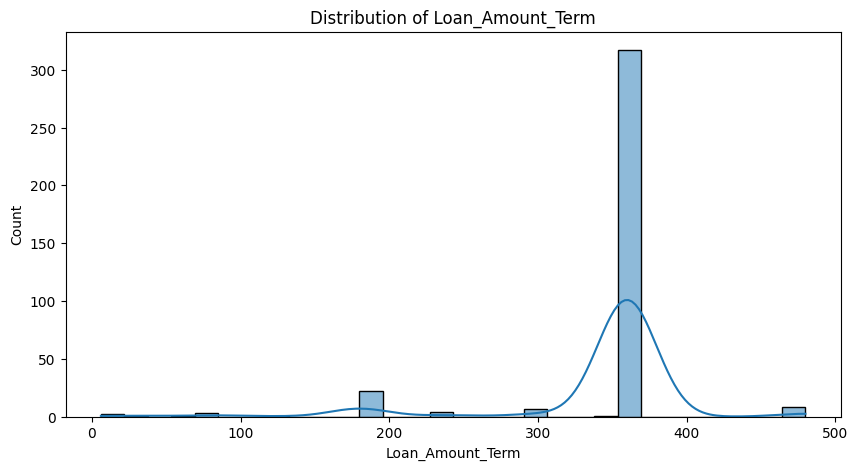

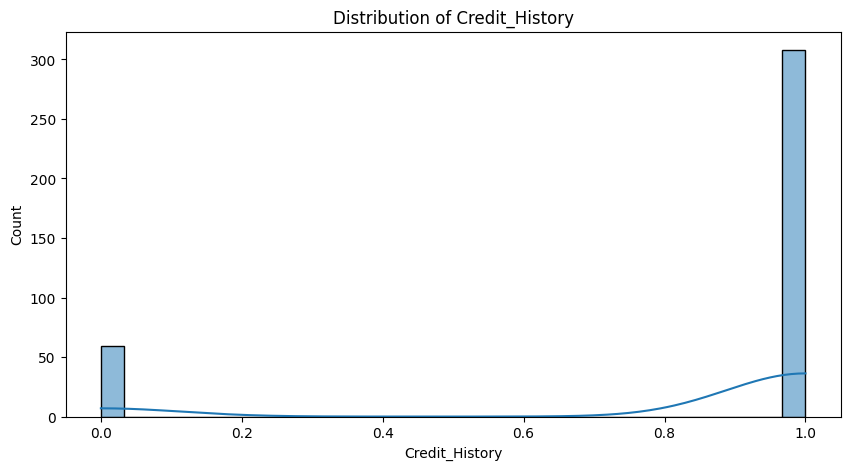

In [22]:
# Merge train and test datasets
merged_data = pd.concat([traindata, testdata], ignore_index=True)

# Univariate analysis of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=traindata)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Univariate analysis of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(traindata[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


#Bivariate Analysis

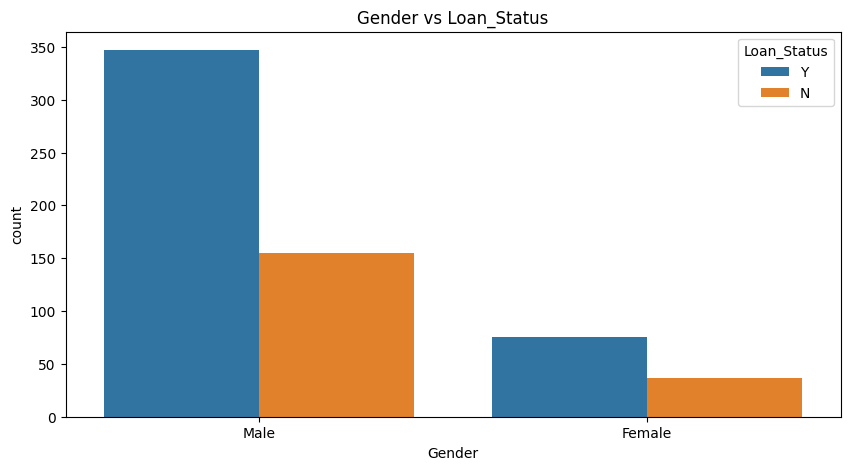

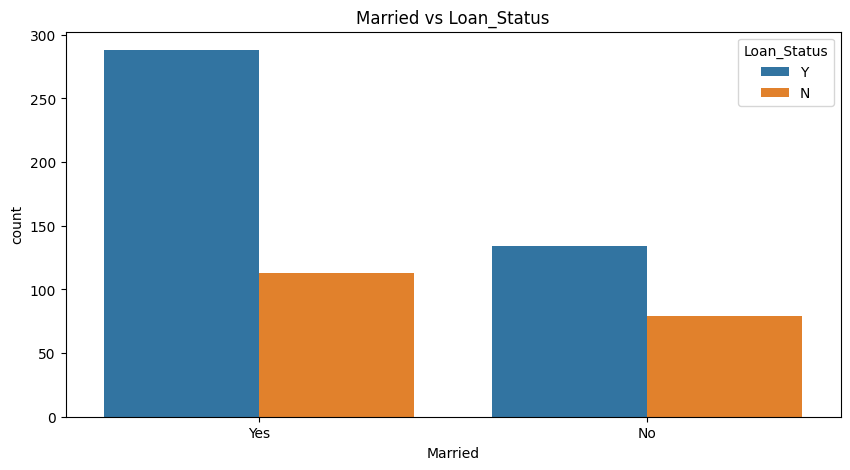

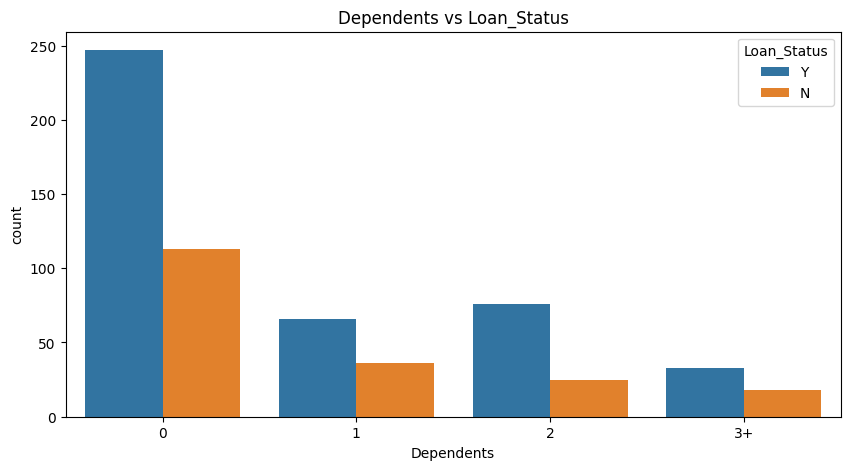

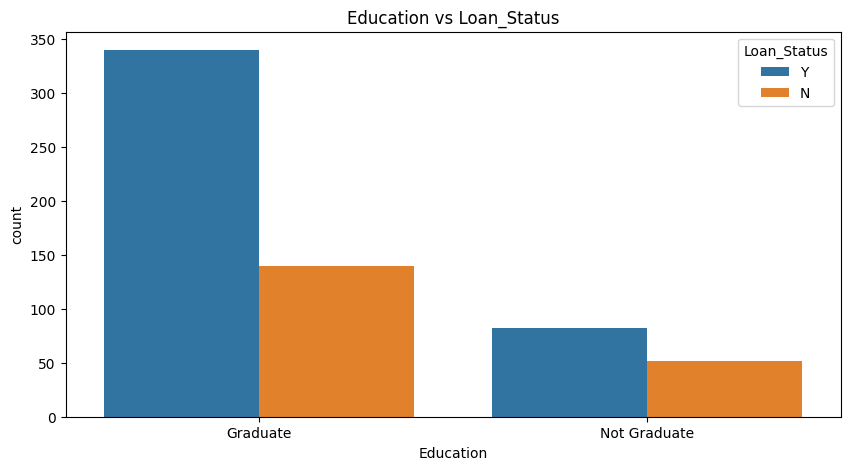

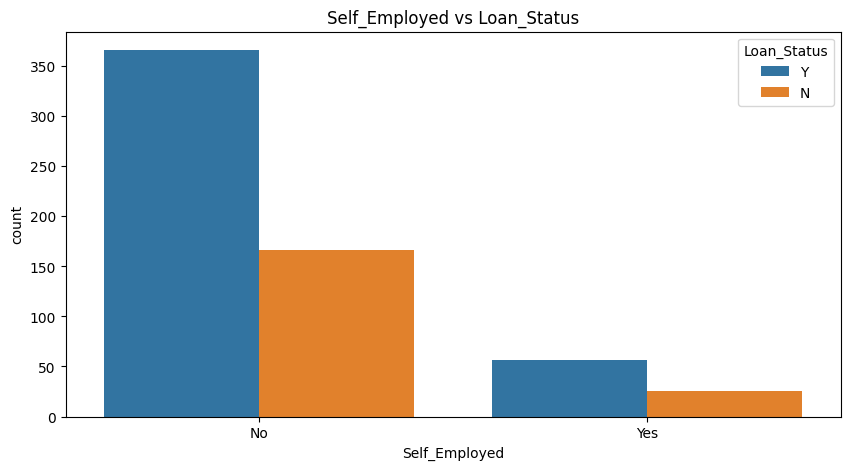

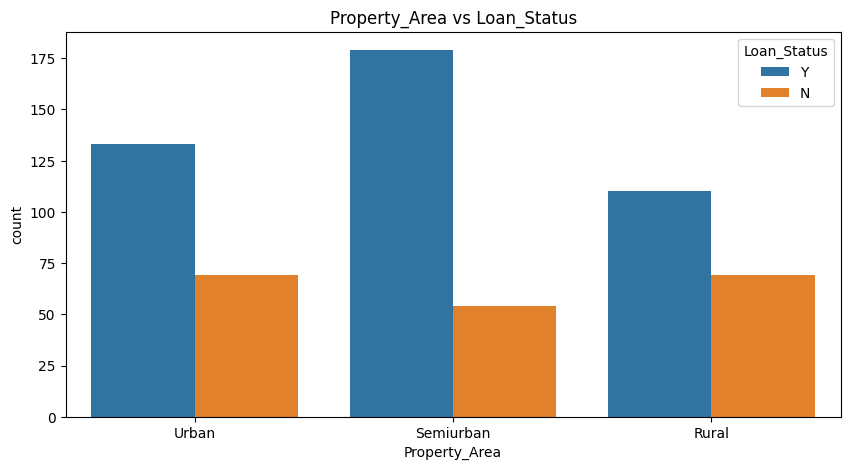

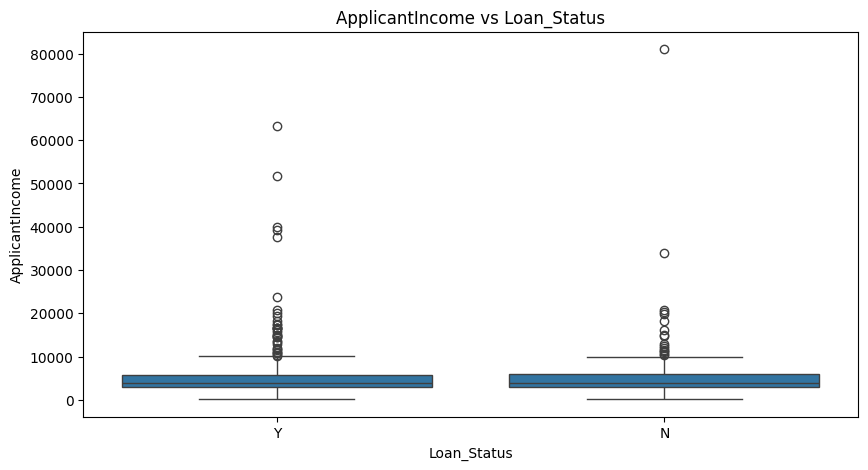

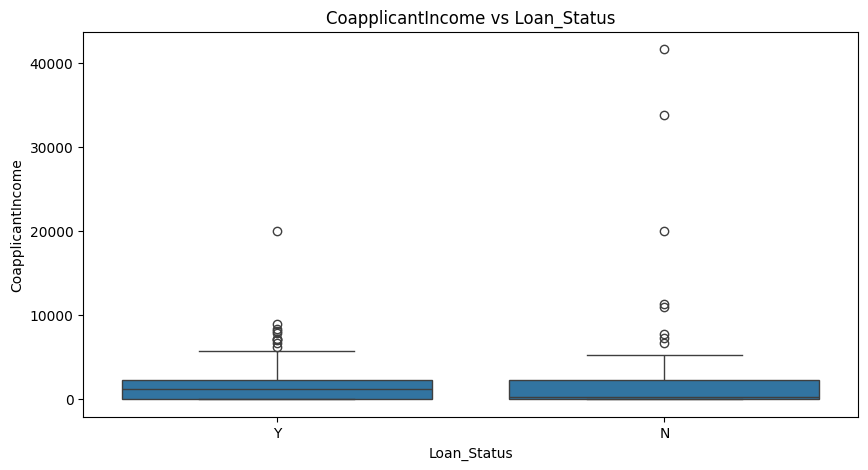

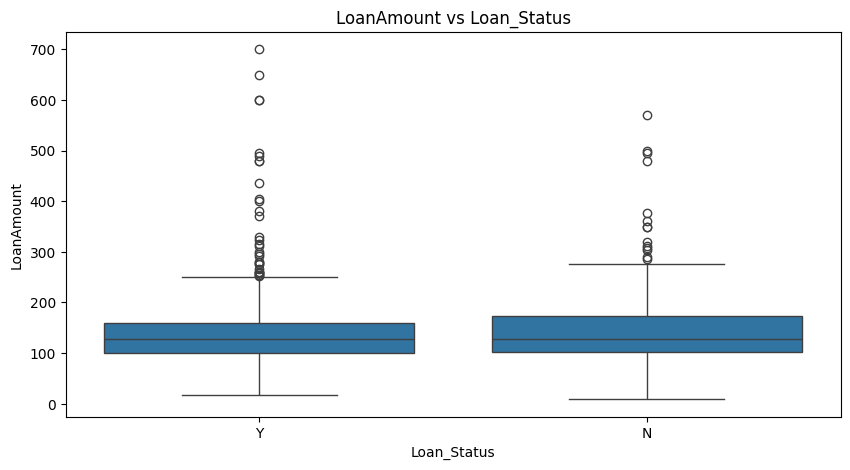

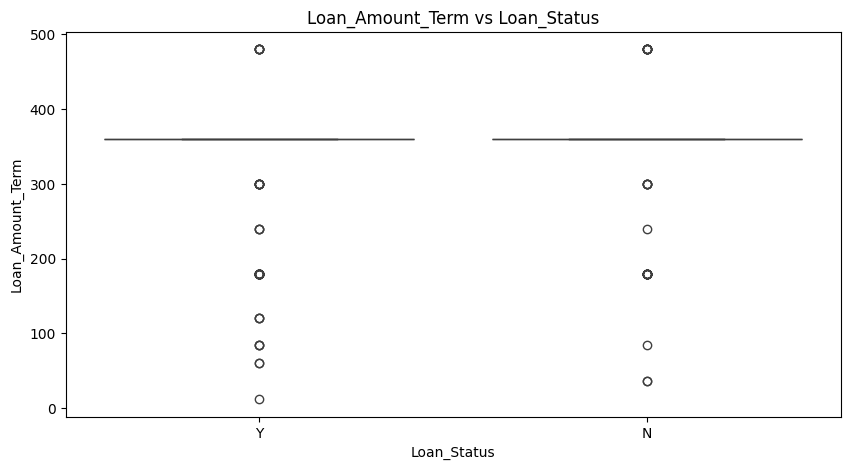

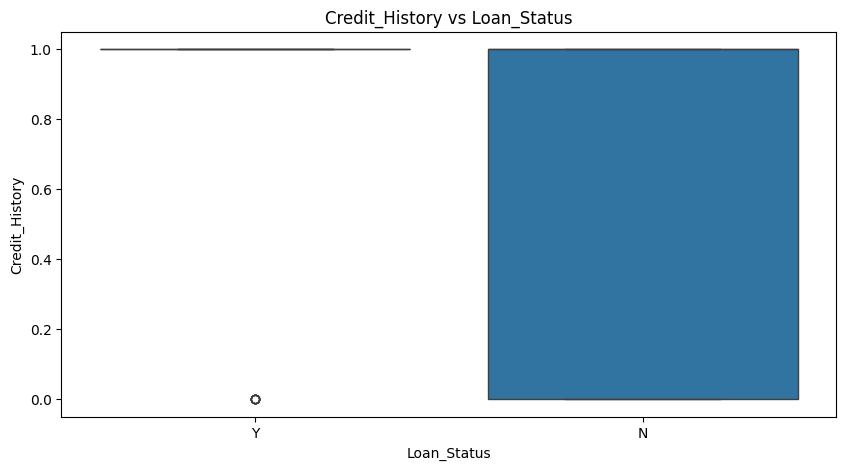

In [23]:
# Merge train and test datasets
merged_data = pd.concat([traindata, testdata], ignore_index=True)

# Bivariate analysis of categorical features vs Loan_Status
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Loan_Status', data=merged_data)
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

# Bivariate analysis of numerical features vs Loan_Status
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Loan_Status', y=feature, data=merged_data)
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

#1.	Missing value and outlier treatment

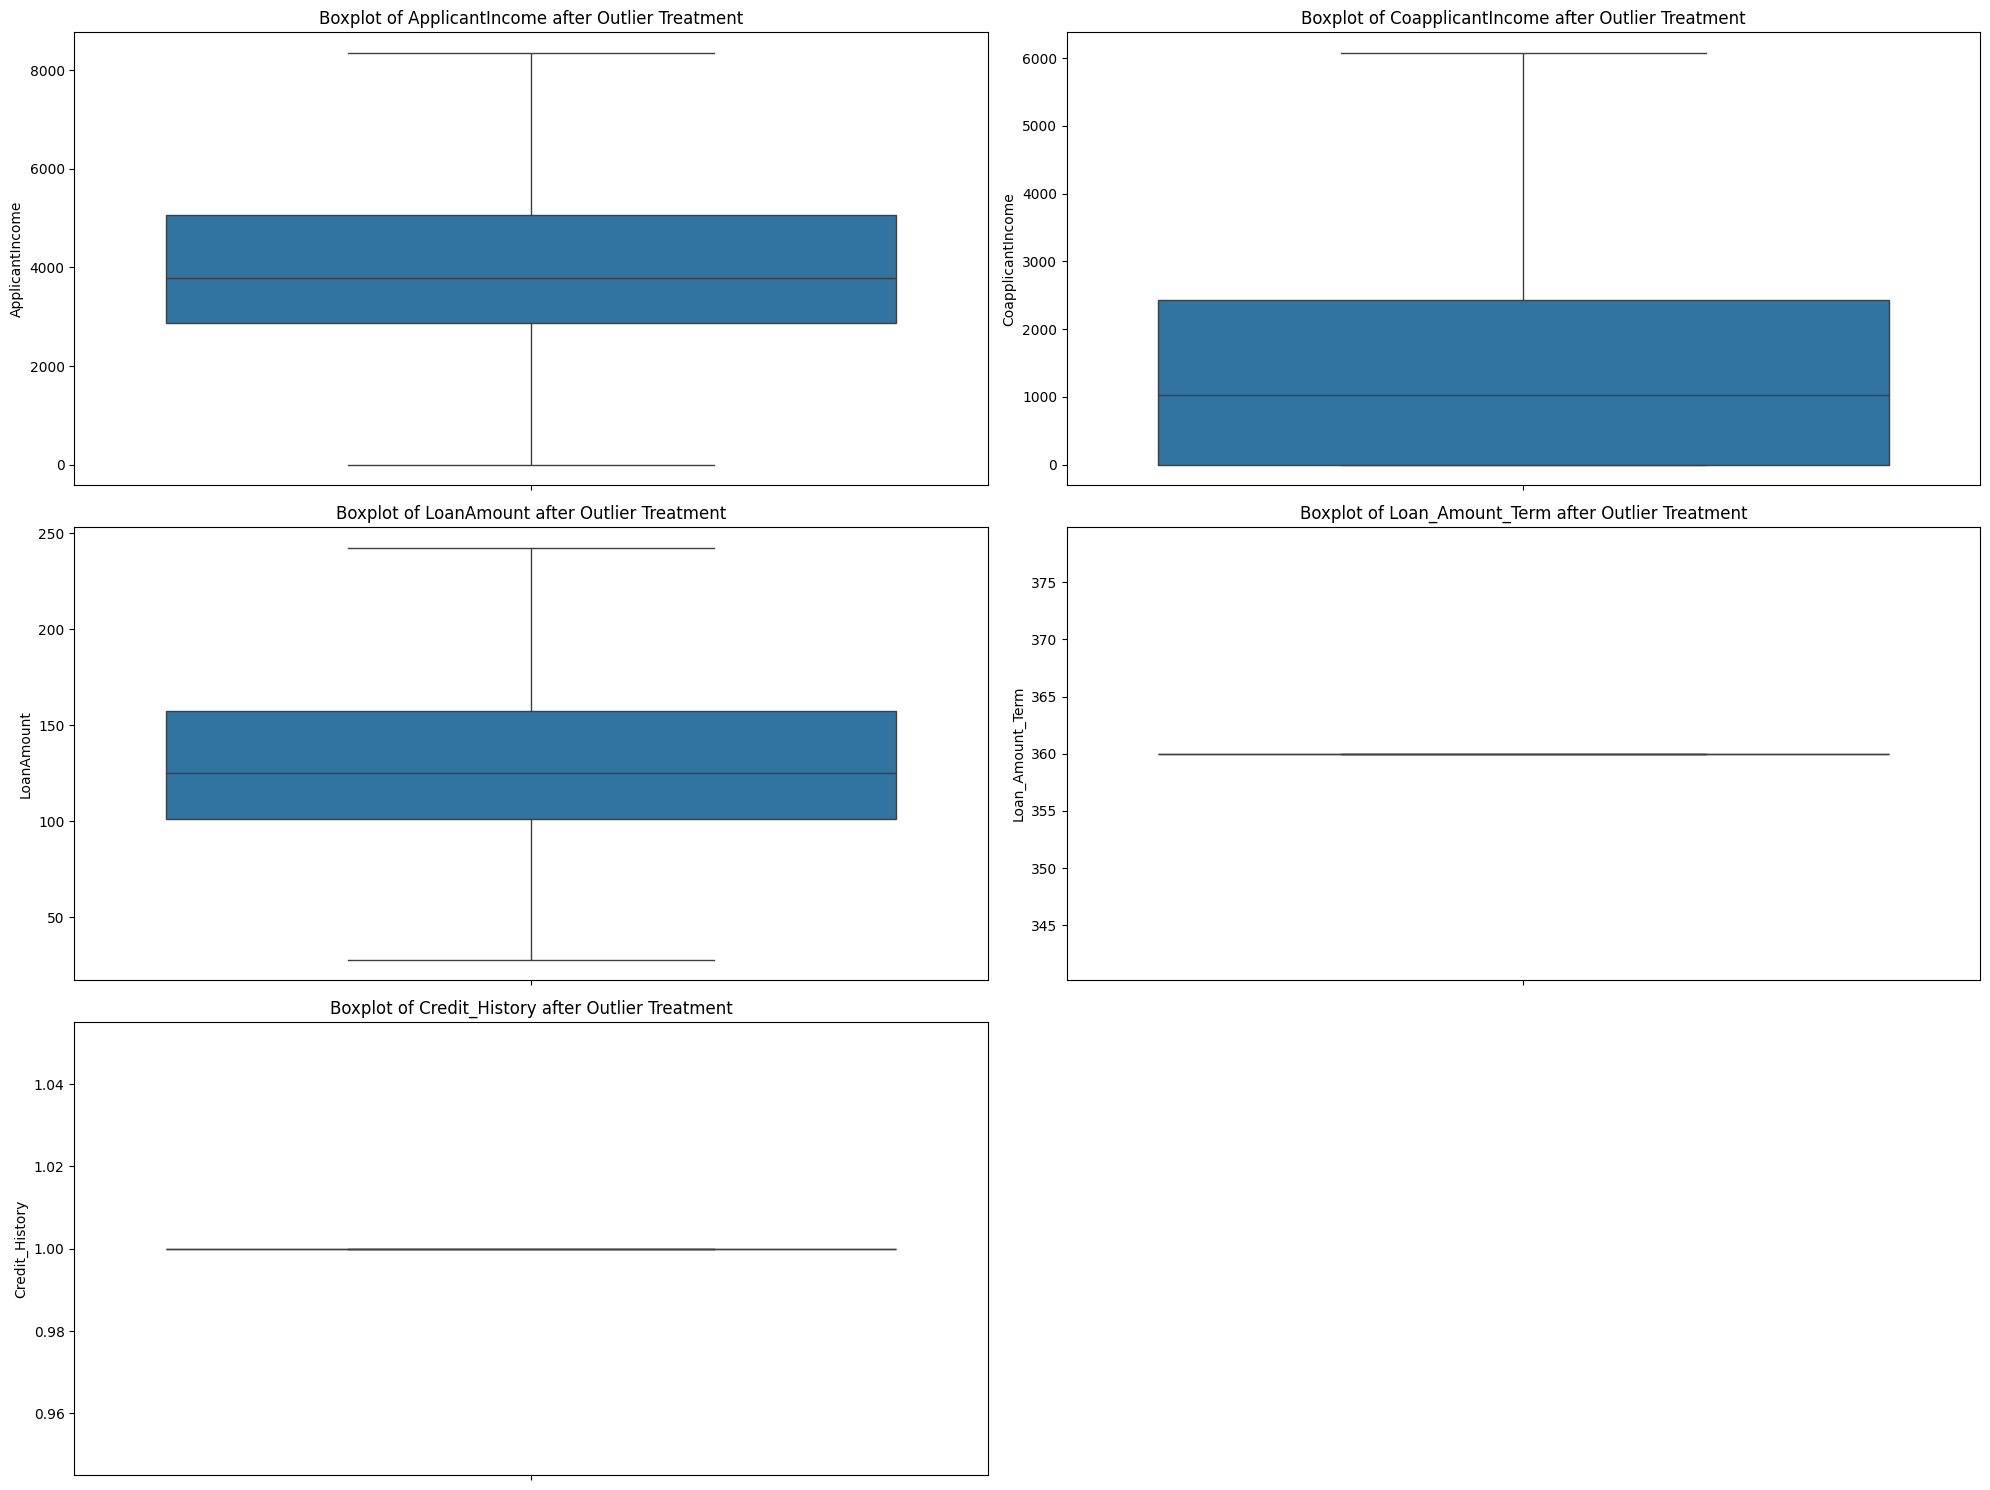

In [25]:
# Define a function to treat outliers using the IQR method
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply the function to numerical features
for feature in numerical_features:
    treat_outliers(traindata, feature)

# Verify the outlier treatment
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=traindata, y=feature)
    plt.title(f'Boxplot of {feature} after Outlier Treatment')

plt.tight_layout()
plt.show()


#2. Correlation study: Heat map

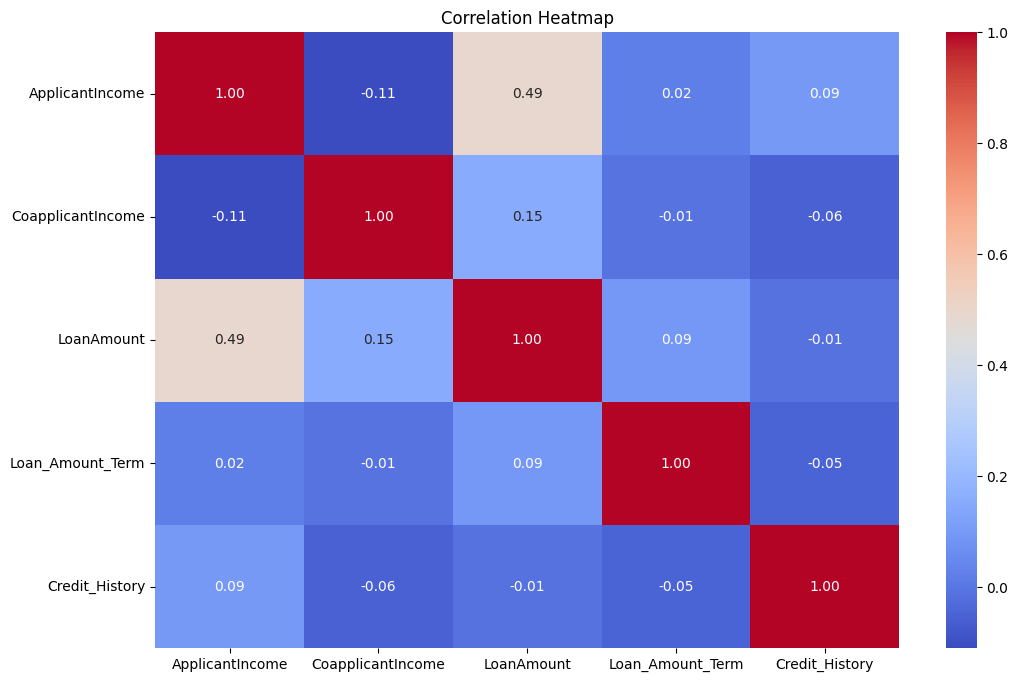

In [24]:
# Selecting only numerical columns
numerical_columns = traindata.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(traindata[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#3. Use the test data to train the model and test data for prediction

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
traindata = pd.read_csv("loan_sanction_train.csv")
testdata = pd.read_csv("loan_sanction_test.csv")

# Impute missing values
traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
traindata['Married'].fillna(traindata['Married'].mode()[0], inplace=True)
traindata['Dependents'].fillna(traindata['Dependents'].mode()[0], inplace=True)
traindata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0], inplace=True)
traindata['Credit_History'].fillna(traindata['Credit_History'].mode()[0], inplace=True)
traindata['LoanAmount'].fillna(traindata['LoanAmount'].median(), inplace=True)
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].median(), inplace=True)

testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Married'].fillna(testdata['Married'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].median(), inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].median(), inplace=True)

# Encode categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoder = LabelEncoder()

for feature in categorical_features:
    traindata[feature] = encoder.fit_transform(traindata[feature])
    testdata[feature] = encoder.transform(testdata[feature])

# Encode the target variable
traindata['Loan_Status'] = encoder.fit_transform(traindata['Loan_Status'])

# Features and target variable for training
X_train = traindata.drop(columns=['Loan_ID', 'Loan_Status'])
y_train = traindata['Loan_Status']

# Features for testing
X_test = testdata.drop(columns=['Loan_ID'])

# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)
y_test_dummy = [0] * len(y_pred)  
accuracy = accuracy_score(y_test_dummy, y_pred)
conf_matrix = confusion_matrix(y_test_dummy, y_pred)
class_report = classification_report(y_test_dummy, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.17983651226158037
Confusion Matrix:
[[ 66 301]
 [  0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.30       367
           1       0.00      0.00      0.00         0

    accuracy                           0.18       367
   macro avg       0.50      0.09      0.15       367
weighted avg       1.00      0.18      0.30       367



C:\Users\anive\AppData\Local\Temp\ipykernel_1664\3867996812.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
C:\Users\anive\AppData\Local\Temp\ipykernel_1664\3867996812.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

#4.Model Building (Part 1)

In [27]:
# Encode categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoder = LabelEncoder()

for feature in categorical_features:
    traindata[feature] = encoder.fit_transform(traindata[feature])
    testdata[feature] = encoder.transform(testdata[feature])

# Encode the target variable
traindata['Loan_Status'] = encoder.fit_transform(traindata['Loan_Status'])

# Features and target variable for training
X = traindata.drop(columns=['Loan_ID', 'Loan_Status'])
y = traindata['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = nb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Cross-validation score
cv_scores = cross_val_score(nb_model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Make predictions on the test data (if we need to make predictions for submission)
X_test = testdata.drop(columns=['Loan_ID'])
y_test_pred = nb_model.predict(X_test)


Accuracy: 0.7886178861788617
Confusion Matrix:
[[19 24]
 [ 2 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123

Cross-Validation Scores: [0.79032258 0.82258065 0.72580645 0.74193548 0.7704918  0.7704918
 0.83606557 0.81967213 0.7704918  0.85245902]
Mean Cross-Validation Score: 0.7900317292437864


#5. Feature Engineering

In [28]:
def feature_engineering(df):
    # Total Income
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    # Income per Person
    df['IncomePerPerson'] = df['TotalIncome'] / (df['Dependents'].replace('3+', 3).astype(int) + 1)    
    # Loan Amount to Total Income Ratio
    df['LoanToIncomeRatio'] = df['LoanAmount'] / df['TotalIncome']    
    # Loan Term in Years
    df['LoanTermYears'] = df['Loan_Amount_Term'] / 12    
    return df
traindata = feature_engineering(traindata)
testdata = feature_engineering(testdata)

# Encode categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoder = LabelEncoder()

for feature in categorical_features:
    traindata[feature] = encoder.fit_transform(traindata[feature])
    testdata[feature] = encoder.transform(testdata[feature])

# Encode the target variable
traindata['Loan_Status'] = encoder.fit_transform(traindata['Loan_Status'])

# Features and target variable for training
X = traindata.drop(columns=['Loan_ID', 'Loan_Status'])
y = traindata['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = nb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Cross-validation score
cv_scores = cross_val_score(nb_model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Make predictions on the test data (if we need to make predictions for submission)
X_test = testdata.drop(columns=['Loan_ID'])
y_test_pred = nb_model.predict(X_test)


Accuracy: 0.7804878048780488
Confusion Matrix:
[[19 24]
 [ 3 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123

Cross-Validation Scores: [0.77419355 0.82258065 0.72580645 0.75806452 0.7704918  0.7704918
 0.83606557 0.81967213 0.78688525 0.85245902]
Mean Cross-Validation Score: 0.7916710735060815


#6. Model Building (Part 2)

In [29]:


# Load the datasets
traindata = pd.read_csv("loan_sanction_train.csv")
testdata = pd.read_csv("loan_sanction_test.csv")

# Impute missing values
traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
traindata['Married'].fillna(traindata['Married'].mode()[0], inplace=True)
traindata['Dependents'].fillna(traindata['Dependents'].mode()[0], inplace=True)
traindata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0], inplace=True)
traindata['Credit_History'].fillna(traindata['Credit_History'].mode()[0], inplace=True)
traindata['LoanAmount'].fillna(traindata['LoanAmount'].median(), inplace=True)
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].median(), inplace=True)

testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Married'].fillna(testdata['Married'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].median(), inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].median(), inplace=True)

# Feature Engineering
def feature_engineering(df):
    # Total Income
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    
    # Income per Person
    df['IncomePerPerson'] = df['TotalIncome'] / (df['Dependents'].replace('3+', 3).astype(int) + 1)
    
    # Loan Amount to Total Income Ratio
    df['LoanToIncomeRatio'] = df['LoanAmount'] / df['TotalIncome']
    
    # Loan Term in Years
    df['LoanTermYears'] = df['Loan_Amount_Term'] / 12
    
    return df

traindata = feature_engineering(traindata)
testdata = feature_engineering(testdata)

# Encode categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoder = LabelEncoder()

for feature in categorical_features:
    traindata[feature] = encoder.fit_transform(traindata[feature])
    testdata[feature] = encoder.transform(testdata[feature])

# Encode the target variable
traindata['Loan_Status'] = encoder.fit_transform(traindata['Loan_Status'])

# Features and target variable for training
X = traindata.drop(columns=['Loan_ID', 'Loan_Status'])
y = traindata['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()

models = {'Logistic Regression': log_reg, 'Random Forest': rf_model, 'Naive Bayes': nb_model}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print("\n")

# Make predictions on the test data (if we need to make predictions for submission)
X_test = testdata.drop(columns=['Loan_ID'])
final_model = rf_model  # Assume Random Forest performed better
final_model.fit(X, y)
y_test_pred = final_model.predict(X_test)

# Print predictions for inspection (optional)
print(y_test_pred)


C:\Users\anive\AppData\Local\Temp\ipykernel_1664\3424790562.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
C:\Users\anive\AppData\Local\Temp\ipykernel_1664\3424790562.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Model: Logistic Regression
Accuracy: 0.7886178861788617
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



C:\Users\anive\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anive\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Cross-Validation Scores: [0.80645161 0.79032258 0.74193548 0.75806452 0.80327869 0.78688525
 0.83606557 0.85245902 0.7704918  0.83606557]
Mean Cross-Validation Score: 0.7982020095187732


Model: Random Forest
Accuracy: 0.7723577235772358
Confusion Matrix:
[[22 21]
 [ 7 73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123

Cross-Validation Scores: [0.72580645 0.75806452 0.74193548 0.74193548 0.7704918  0.78688525
 0.8852459  0.86885246 0.73770492 0.83606557]
Mean Cross-Validation Score: 0.7852987837123215


Model: Naive Bayes
Accuracy: 0.7804878048780488
Confusion Matrix:
[[19 24]
 [ 3 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86 